In [43]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [44]:
data = pd.read_csv("banana_quality.csv")

""" Nombres de las columnas:

Size: Tamaño del platano
Weight: Peso del platano
Sweetness: Dulzor del platano
Softness: Blandura del platano
HarvestTime: Tiempo transcurrido desde la cosecha del platano
Ripeness: Madurez del platano
Acidity: Acidez del platano
Quality: Calidad del platano


https://www.kaggle.com/datasets/l3llff/banana/data


"""
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [45]:
# ¿Hay valores faltantes / nulos en el dataset?
print(f"Numero de valores faltantes:\n{data.isna().sum()}\n")

# ¿Hay duplicados en el dataset?
print(f"Numero de duplicados: {data.duplicated().sum()}")

Numero de valores faltantes:
Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Numero de duplicados: 0


In [46]:
# Transformamos la columna "Quality" a Booleano
data["Quality"] = data["Quality"].apply(lambda x: True if x == "Good" else False)

In [47]:
X = data.drop(columns=["Quality"])
y= data["Quality"]

X= pd.get_dummies(X)

                 Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
Size         1.000000 -0.181933  -0.258027  0.164526     0.582014  0.042587   
Weight      -0.181933  1.000000   0.422683 -0.189908    -0.079465 -0.035276   
Sweetness   -0.258027  0.422683   1.000000 -0.095338    -0.201657  0.180095   
Softness     0.164526 -0.189908  -0.095338  1.000000     0.194734 -0.253804   
HarvestTime  0.582014 -0.079465  -0.201657  0.194734     1.000000  0.107127   
Ripeness     0.042587 -0.035276   0.180095 -0.253804     0.107127  1.000000   
Acidity     -0.140673  0.443879   0.187059 -0.146014    -0.090903 -0.351531   
Quality      0.352983  0.388789   0.377220 -0.001637     0.376600  0.350503   

              Acidity   Quality  
Size        -0.140673  0.352983  
Weight       0.443879  0.388789  
Sweetness    0.187059  0.377220  
Softness    -0.146014 -0.001637  
HarvestTime -0.090903  0.376600  
Ripeness    -0.351531  0.350503  
Acidity      1.000000 -0.000860  
Quality     -0.0

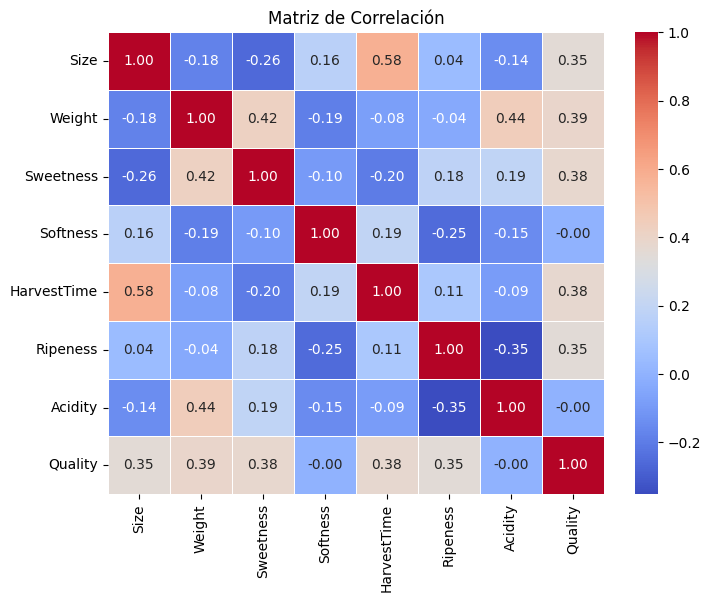

In [48]:
#Matriz de correlacion completa
corr = data.corr()

print(corr)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show() 

In [49]:
#Ahora voy a calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif_data)

""" 
· VIF < 5 → No hay problema de colinealidad.
· VIF entre 5 y 10 → Hay colinealidad moderada, revisar.
· VIF > 10 → Fuerte colinealidad, se recomienda eliminar la variable. 
"""

      Variable       VIF
0         Size  1.712317
1       Weight  1.639860
2    Sweetness  1.366109
3     Softness  1.194550
4  HarvestTime  1.724347
5     Ripeness  1.277970
6      Acidity  1.392000


' \n· VIF < 5 → No hay problema de colinealidad.\n· VIF entre 5 y 10 → Hay colinealidad moderada, revisar.\n· VIF > 10 → Fuerte colinealidad, se recomienda eliminar la variable. \n'


Resultados con Sobremuestreo Aleatorio:
Accuracy: 88.50%
Precision: 86.68%
Recall: 90.63%
F1-Score: 88.61%
AUC-ROC: 95.57%

Resultados con SMOTE:
Accuracy: 88.50%
Precision: 86.68%
Recall: 90.63%
F1-Score: 88.61%
AUC-ROC: 95.57%

Resultados con Submuestreo Aleatorio:
Accuracy: 88.50%
Precision: 86.68%
Recall: 90.63%
F1-Score: 88.61%
AUC-ROC: 95.57%

Resultados con NearMiss:
Accuracy: 88.50%
Precision: 86.68%
Recall: 90.63%
F1-Score: 88.61%
AUC-ROC: 95.57%

El mejor método de balanceo es: NearMiss con F1-Score: 88.61% y AUC-ROC: 95.57%

Resultados con ajuste manual de hiperparámetros:
Accuracy: 88.50%
Precision: 86.68%
Recall: 90.63%
F1-Score: 88.61%
AUC-ROC: 95.57%

Resultados con ajuste automático de hiperparámetros:
Mejores parámetros: {'C': 0.1, 'solver': 'liblinear'}
Mejor Accuracy en validación cruzada: 87.41%
Accuracy: 88.50%
Precision: 86.68%
Recall: 90.63%
F1-Score: 88.61%
AUC-ROC: 95.57%
    Real Predicción
0   Malo       Malo
1   Malo      Bueno
2  Bueno      Bueno
3   Malo 

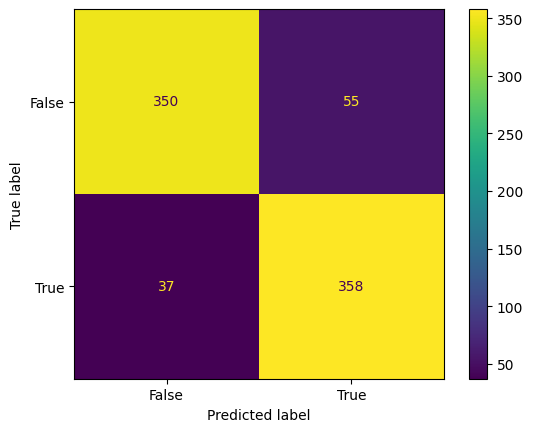

In [51]:
# Ahora voy a escalar las variables para mejorar la estabilidad del modelo

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hago la división de los datos
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

# --------------------
# MÉTODOS DE BALANCEO DE CLASES
# --------------------
# 1. Sobremuestreo aleatorio
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# --------------------
# MÉTODOS DE BALANCEO DE CLASES
# --------------------
# 1. Sobremuestreo aleatorio
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# 2. SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Submuestreo aleatorio
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# 4. NearMiss (submuestreo basado en distancia)
nearmiss = NearMiss()
X_train_nm, y_train_nm = nearmiss.fit_resample(X_train, y_train)

# --------------------
# EVALUACIÓN DE MÉTODOS DE BALANCEO
# --------------------
resultados_balanceo = {}

def evaluar_balanceo(X_train_resampled, y_train_resampled, metodo):
    model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) * 100
    resultados_balanceo[metodo] = (f1, auc)
    print(f"\nResultados con {metodo}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_pred) * 100:.2f}%")
    print(f"Recall: {recall_score(y_test, y_pred) * 100:.2f}%")
    print(f"F1-Score: {f1:.2f}%")
    print(f"AUC-ROC: {auc:.2f}%")

evaluar_balanceo(X_train_ros, y_train_ros, "Sobremuestreo Aleatorio")
evaluar_balanceo(X_train_smote, y_train_smote, "SMOTE")
evaluar_balanceo(X_train_rus, y_train_rus, "Submuestreo Aleatorio")
evaluar_balanceo(X_train_nm, y_train_nm, "NearMiss")

# Seleccionar el mejor método de balanceo
mejor_metodo = max(resultados_balanceo, key=lambda k: resultados_balanceo[k])
print(f"\nEl mejor método de balanceo es: {mejor_metodo} con F1-Score: {resultados_balanceo[mejor_metodo][0]:.2f}% y AUC-ROC: {resultados_balanceo[mejor_metodo][1]:.2f}%")

# Obtener los datos balanceados del mejor método encontrado
if mejor_metodo == "Sobremuestreo Aleatorio":
    X_train_resampled, y_train_resampled = X_train_ros, y_train_ros
elif mejor_metodo == "SMOTE":
    X_train_resampled, y_train_resampled = X_train_smote, y_train_smote
elif mejor_metodo == "Submuestreo Aleatorio":
    X_train_resampled, y_train_resampled = X_train_rus, y_train_rus
elif mejor_metodo == "NearMiss":
    X_train_resampled, y_train_resampled = X_train_nm, y_train_nm

# --------------------
# MÉTODO 1: Ajuste manual de hiperparámetros
# --------------------
manual_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)  # Ejemplo de hiperparámetros ajustados manualmente
manual_model.fit(X_train_resampled, y_train_resampled)  # Entrenar modelo

# Predicciones
y_pred_manual = manual_model.predict(X_test)

# Evaluación del modelo ajustado manualmente
print("\nResultados con ajuste manual de hiperparámetros:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_manual) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_manual) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_manual) * 100:.2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred_manual) * 100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(y_test, manual_model.predict_proba(X_test)[:,1]) * 100:.2f}%")

# --------------------
# MÉTODO 2: Ajuste automático con GridSearchCV
# --------------------
parametros = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Diferentes valores de regularización
    "solver": ["liblinear", "lbfgs"]  # Diferentes algoritmos de optimización
}

# Configurar GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=500), parametros, cv=5, scoring="accuracy", n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)  # Entrenar búsqueda de hiperparámetros

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones del mejor modelo
y_pred_best = best_model.predict(X_test)

# Evaluación del mejor modelo
print("\nResultados con ajuste automático de hiperparámetros:")
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor Accuracy en validación cruzada: {grid_search.best_score_ * 100:.2f}%")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_best) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_best) * 100:.2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred_best) * 100:.2f}%")
print(f"AUC-ROC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]) * 100:.2f}%")


# --------------------
# ENTRENAMIENTO FINAL Y EVALUACIÓN
# --------------------

# Entrenar el mejor modelo con los datos balanceados
best_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones finales con el mejor modelo y el mejor balanceo
y_pred_final = best_model.predict(X_test)

# Crear DataFrame de resultados
resultados = pd.DataFrame({
    "Real": y_test.values,
    "Predicción": y_pred_final
})

# Mapear valores 0 y 1 a etiquetas comprensibles
resultados["Real"] = resultados["Real"].map({True: "Bueno", False: "Malo"})
resultados["Predicción"] = resultados["Predicción"].map({True: "Bueno", False: "Malo"})

# Mostrar las primeras filas de la tabla
print(resultados.head(10))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()